In [42]:
import numpy as np
import pickle
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.utils import resample


In [43]:
match_train=np.load("match_train.npy", allow_pickle=True)
#pickle.load(match_train, rb)
written_train=np.load("written_train.npy")
spoken_train=np.load("spoken_train.npy")
written_test=np.load("written_test.npy")
spoken_test=np.load("spoken_test.npy")

In [44]:
print('Shape of written train:', np.shape(written_train))
print('Shape of spoken train:', np.shape(spoken_train))
print('Shape of written test:', np.shape(written_test))
print('Shape of written test:', np.shape(spoken_test))


Shape of written train: (45000, 784)
Shape of spoken train: (45000,)
Shape of written test: (15000, 784)
Shape of written test: (15000,)


In [45]:
maxs = []
for i in range(0, len(spoken_train)):
    maxs.append(spoken_train[i].shape[0])

from keras.preprocessing.sequence import pad_sequences
spoken_train_3d= pad_sequences(spoken_train, maxlen= max(maxs))
print(spoken_train_3d.shape)

spoken_train_2d =spoken_train_3d.reshape(45000, 93*13)
spoken_train_2d

(45000, 93, 13)


array([[ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ..., -2,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [46]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
spoken_train_mmsc = mm_scaler.fit_transform(spoken_train_2d)
written_train_mmsc = mm_scaler.fit_transform(written_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [47]:
X_train = np.hstack([spoken_train_mmsc, written_train_mmsc])
print(X_train.shape)

(45000, 1993)


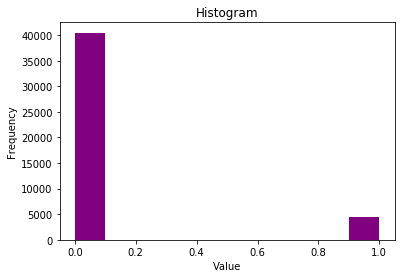

In [48]:
y_train = match_train
y_train = y_train + 0

# check imbalanced data set
plt.hist(y_train, color='purple')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()  

In [49]:
X_train = pd.DataFrame(data=X_train)
y_train = pd.DataFrame(data=y_train)

In [50]:
# train and test split, later will add validation split too
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=44)

In [51]:
data = pd.concat([X_train, y_train], axis=1)
print(np.shape(data))
print(np.shape(X_train))
print(np.shape(y_train))

(31500, 1994)
(31500, 1993)
(31500, 1)


In [52]:
# # separate minority and majority classes
# not_match = data[y_train == 0]
# match = data[y_train == 1]

# # upsample minority
# match_upsampled = resample(match,
#                           replace=True, # sample with replacement
#                           n_samples=len(not_match), # match number in majority class
#                           random_state=27) # reproducible results

In [54]:
import keras
from keras import models
from keras import layers
from keras.layers import Dropout
import keras_metrics
import tensorflow as tf

hidden = 100
network = models.Sequential()
network.add(layers.Dense(hidden, use_bias='true', activation='relu', input_shape=(1993,)))
network.add(Dropout(rate=0.2))
network.add(layers.Dense(hidden, use_bias='true', activation='relu'))
network.add(Dropout(rate=0.2))
network.add(layers.Dense(2, use_bias='true', activation='sigmoid'))

keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
keras.optimizers.SGD(lr=0.001, momentum=0.01, decay=0.0, nesterov=False)

# network.compile(optimizer='sgd',
#                 loss='binary_crossentropy',
#                 metrics=[#keras_metrics.precision(), 
#                          keras_metrics.recall()])
#network.compile(optimizer='adam', loss='binary_crossentropy', metrics=[precision, f1_score])
network.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [55]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [56]:
history = network.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=1)

Train on 31500 samples, validate on 13500 samples
Epoch 1/50
31500/31500 [==============================] - 38s 1ms/step - loss: 0.3426 - acc: 0.8982 - val_loss: 0.3464 - val_acc: 0.9004
Epoch 2/50
31500/31500 [==============================] - 37s 1ms/step - loss: 0.3358 - acc: 0.8986 - val_loss: 0.3244 - val_acc: 0.9004
Epoch 3/50
31500/31500 [==============================] - 36s 1ms/step - loss: 0.3337 - acc: 0.8986 - val_loss: 0.3306 - val_acc: 0.9004
Epoch 4/50
31500/31500 [==============================] - 35s 1ms/step - loss: 0.3332 - acc: 0.8986 - val_loss: 0.3273 - val_acc: 0.9004
Epoch 5/50
31500/31500 [==============================] - 40s 1ms/step - loss: 0.3322 - acc: 0.8986 - val_loss: 0.3342 - val_acc: 0.9004
Epoch 6/50
31500/31500 [==============================] - 36s 1ms/step - loss: 0.3314 - acc: 0.8986 - val_loss: 0.3384 - val_acc: 0.9004
Epoch 7/50
31500/31500 [==============================] - 36s 1ms/step - loss: 0.3308 - acc: 0.8986 - val_loss: 0.3281 - val_acc